# Learning from the Data, Homework 5

## Linear Regression Error

Consider a noisy target $y = \mathbf{w}^{∗T} \mathbf{x} + \epsilon$, where $\mathbf{x} \in \mathbb{R}^d$ (with the added coordinate $x_0 = 1$), $y \in \mathbb{R}$, $\mathbf{w}^∗$ is an unknown vector, and $\epsilon$ is a noise term with zero mean and $\sigma^2$ variance. Assume $\epsilon$ is independent of $\mathbf{x}$ and of all other $\epsilon$’s. If linear regression is carried out using a training data set $\mathcal{D} = \{(\mathbf{x}_1, y_1), . . . , (\mathbf{x}_N, y_N )\}$, and outputs the parameter vector $\mathbf{w}_\text{lin}$, it can be shown that the expected in-sample error $E_\text{in}$ with respect to $\mathcal{D}$ is given by:

$\mathbb{E}_\mathcal{D}[E_\text{in}(\mathbf{w}_\text{lin})] = \sigma^2 \left(1 - \frac{d + 1}{N}\right)$

### Problem 1

For $sigma = 0.1$ and $d = 8$, which among the following choices is the smallest number of examples $N$ that will result in an expected $E_\text{in}$ greater than 0.008?

In [1]:
def e_in(N, sigma=0.1, d=8.0):
    return (sigma**2)*(1-((d + 1)/N))
    
for N in [10, 25, 100, 500, 1000]:
    print(str(N) + ": " + str(e_in(N)))

10: 0.001
25: 0.006400000000000001
100: 0.009100000000000002
500: 0.009820000000000002
1000: 0.009910000000000002


Answer: [**c**] 100

## Nonlinear Transforms

In the linear classification, consider the feature transform $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ (plus the added zeroth coordinate) given by:

$\Phi(1, x_1, x_2) = (1, x_1^2, x_2^2)$

### Problem 2

Which of the following sets of constraints on the weights in the $\mathcal{Z}$ space could correspond to the hyperbolic decision boundary in $\mathcal{X}$ depicted in the figure?

You may assume that $\tilde{w}_0$ can be selected to achieve the desired boundary.

$w_0*1 + w_1*x_1^2 + w_2*x_2^2 = 0$

$x_2 = \sqrt{\frac{-w_0 - w_1*x_1^2}{w_2}}$

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


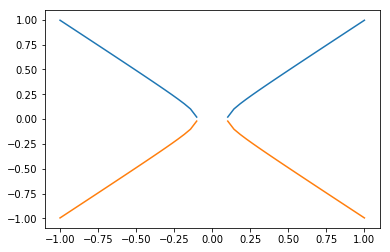

0.15
0.15
-0.9750000000000001
-0.9750000000000001


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def hyperbolic(w0, w1, w2, x1):
    x2 = np.sqrt((-w0 - w1*x1**2)/w2)
    return x2, -x2 

x1 = np.linspace(-1, 1)

# Pick values of w0, w1, w2, until you get a shape that approximates
# boundaries that we are given.
x2, x2_neg = hyperbolic(0.01, -1, 1, x1)

plt.plot(x1, x2, 
         x1, x2_neg)
plt.show()

def evaluate(w0, w1, w2, x1, x2):
    return w0*1 + w1*x1**2 + w2*x2**2

# Evaluate points on either side of boundary to verify that the inner
# region is +1 and left and right sides are -1.
print(evaluate(-0.10, -2, 1, 0, 0.5))
print(evaluate(-0.10, -2, 1, 0, -0.5))
print(evaluate(-0.10, -2, 1, 0.75, 0.5))
print(evaluate(-0.10, -2, 1, -0.75, 0.5))

Answer: [**d**] $\tilde{w_1} < 0, \tilde{w_2} > 0$ 

### Problem 3

Now, consider the 4th order polynomial transform from the input space $\mathbb{R}^2$:

$\Phi_4 : \mathbb{x} \rightarrow (1, x_1, x_2, x_1^2, x_2^2, x_1^3, x_1^2x_2, x_1, x_2^2, x_2^3, x_1^4, x_1^3x_2, x_1^2x_2^2, x_1x_2^3, x_2^4)$

What is the smallest value among the following choices that is *not* smaller than the VC dimension of a linear model in this transformed space?

Since there are 15 parameters in the transformed space, then $d_\text{vc} \leq 15$.

Answer: [**c**] 15

## Gradient Descent

Consider the nonlinear error surface $E(u,v) = (ue^v - 2ve^{-u})^2$. We start at the point $(u,v) = (1,1)$ and minimize this error using gradient descent in the $uv$ space. Use $\eta = 0.1$ (learning rate, not step size).

### Problem 4

What is the partial derivative of $E(u,v)$ with respect to $u$, i.e., $\frac{\partial E}{\partial u}$?

By the chain rule, $\frac{\partial E}{\partial u} = 2(ue^v - 2ve^{-u})(e^v + 2ve^{-u})$.

Answer: [**e**] $2(e^v + 2ve^{-u})(ue^v - 2ve^{-u})$

### Problem 5

How many iterations (among the given choices) does it take for the error $E(u,v)$ to fall below $10^{-14}$ for the first time? In your programs, make sure to use double precision to get the needed accuracy.

In [3]:
def E_in(u, v):
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def du(u, v):
    return 2*(np.exp(v) + 2*v*np.exp(-u))*(u*np.exp(v) - 2*v*np.exp(-u))

def dv(u, v):
    return 2*(u*np.exp(v) - 2*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u)*v)

n = 0  # iterations
u = 1.0
v = 1.0
eta = 0.1
error = E_in(u, v)
print("starting error:", error)

while error > 10e-14:
    delta_u = eta*du(u, v)
    delta_v = eta*dv(u, v)
    u -= delta_u
    v -= delta_v
    error = E_in(u, v)
    n += 1

print("iterations:", n)
print("error:", error)

starting error: 3.93039723188
iterations: 10
error: 1.20868339442e-15


Answer: [**d**] 10

### Problem 6

After running enough iterations such that the error has just dropped below $10^{-14}$, what are the closest values (in Euclidean distance) among the following choices to the final $(u, v)$ you go in Problem 5?

In [4]:
print("final (u, v):", u, v)

final (u, v): 0.0447362903978 0.0239587140991


Answer: [**e**] (0.045, 0.024)

### Problem 7

Now, we will compare the performance of "coordinate descent." In each iteration, we have two steps along the 2 coordinates. Step 1 is to move only along the $u$ coordinate to reduce the error (assume first-order approximation holds like in gradient descent), and step 2 is to reevaluate and move only along the $v$ coordinate to reduce the error (again, assume first-order approximation holds). Use the same learning rate of $\eta = 0.1$ as we did in gradient descent. What will the error $E(u,v$ be closest to after 15 full iterations (30 steps)?

In [5]:
u = 1.0
v = 1.0
eta = 0.1
error = E_in(u, v)
print("starting error:", error)

for i in range(15):
    # Step 1
    delta_u = eta*du(u, v)
    u -= delta_u
    # Step 2
    delta_v = eta*dv(u, v)
    v -= delta_v
    error = E_in(u, v)

print("error:", error)

starting error: 3.93039723188
error: 0.139813791996


Answer: [**a**] $10^{-1}$

## Logistic Regression

In this problem you will create your own target function $f$ (probability in this case) and data set $\mathcal{D}$ to see how Logistic Regression works. For simplicity, we will take $f$ to be a 0/1 probability so $y$ is a deterministic function of $\mathbf{x}$.

Take $d = 2$ so you can visualize the problem, and let $\mathcal{X} = [-1, 1]\times[-1,1]$ with uniform probability of picking each $\mathbf{x} \in \mathcal{X}$. Choose a line in the plane as the boundary between $f(\mathbf{x}) = 1$ (where $y$ has to be +1) and $f(\mathbf{x}) = 0$ (where $y$ has to be -1) by taking two random, uniformly distributed points from $\mathcal{X}$ and taking the line passing through them as the boundary between $y = \pm1$. Pick $N = 100$ traning points at random from $\mathcal{X}$, and evaluate the outputs $y_n$ for each of these points $\mathbf{x}_n$.

Run Logistic Regression with Stochastic Gradient Descent to find $g$, and estimate $E_\text{out}$ (the **cross entropy** error) by generating a sufficiently large, separate set of points to evaluate the error. Repeat the experiment for 100 runs with different targets and take the average. Initialize the weight vector of Logistic Regression to all zeros in each run. Stop the algorithm when $\| \mathbf{w}^{(t-1)} - \mathbf{w}^{(t)}\| < 0.01$, where $\mathbf{w}^{(t)}$ denotes the weight vector at the end of epoch $t$. An epoch is a full pass through the $N$ data points (use a random permutation of 1, 2, ..., $N$ to present the data points to the algorithm within each epoch, and use different permutations for different epochs). Use a learning rate of 0.01.

### Problem 8

Which of the following is closest to $E_\text{out}$ for $N = 100$?

In [6]:
import numpy as np
np.random.seed(1)
def generate_line():
    x_rand = np.random.uniform(-1, 1, size=(2,2))
    slope = (x_rand[0,1] - x_rand[0,0])/(x_rand[1,1] - x_rand[1,0])
    intercept = x_rand[0,1] - slope*x_rand[0,0]
    W_true = np.array([[intercept], [slope], [-1]])
    return W_true

def generate_points(W_true, N=100):
    ones = np.ones((1, N))
    X = np.vstack((ones, np.random.uniform(-1,1, size=(2,N))))
    Y = np.sign(np.dot(W_true.T, X))
    return X, Y

def shuffle_examples(X, Y):
    X_Y = np.vstack((X, Y)).T
    np.random.shuffle(X_Y)
    X_Y = X_Y.T
    X = X_Y[0:3, :]
    Y = X_Y[[3], :]
    return X, Y

def estimate_e_out(W_true, W):
    X, Y = generate_points(W_true, N=1000)
    error = 0
    for i in range(X.shape[1]):
        x = X[:, [i]]
        y = Y[:, i]
        error += np.log(1 + np.exp(-y*np.dot(W.T,x)))/1000
    return error

def grad_descent(W_true, X, Y, eta = 0.01, max_epochs = 10000):
    W = np.zeros((3,1))
    m_examples = X.shape[1]
    for n in range(max_epochs):
        cost = 0
        W_old = np.copy(W)
        X, Y = shuffle_examples(X, Y)
        for i in range(m_examples):
            x = X[:, [i]]
            y = Y[:, i]
            grad = -(y*x)/(1 + np.exp(y*np.dot(W.T,x)))
            W = W - eta*grad
            cost += np.log(1 + np.exp(-y*np.dot(W.T,x)))/m_examples
        if np.linalg.norm(W_old-W) < 0.01:
            return cost, n, W, estimate_e_out(W_true, W)

W_true = generate_line()
X, Y = generate_points(W_true)

mean_epochs = 0
mean_e_out = 0
for i in range(100):
    W_true = generate_line()
    X, Y = generate_points(W_true)
    cost, epochs, W, e_out = grad_descent(W_true, X, Y)
    mean_epochs += epochs/100
    mean_e_out += e_out/100

print("Mean out of sample error:", mean_e_out)

Mean out of sample error: [[ 0.10123029]]


Answer: [**d**] 0.10

### Problem 9

How many epochs does it take on average for Logistic Regression to converge for $N = 100$ using the above initialization and termination rules and the specified learning rate? Pick the value that is closest to your results.

In [7]:
print("Mean epochs to convergence:", mean_epochs)

Mean epochs to convergence: 324.86999999999995


Answer: [**a**] 350

## PLA as SGD

### Problem 10

The Perceptron Learning Algorithm can be implemented as SGD using which of the following error functions $e_n(\mathbf{w})$? Ignore the points $\mathbf{w}$ at which $e_n(\mathbf{w})$ is not twice differentiable.

The error should be 0 if all points are classified correctly, and positive otherwise. The function $e_n(\mathbf{w}) = −\min(0,y_n\mathbf{w}^\text{T}x_n)$ is the only error function that meets these criteria.

Answer: [**e**] $e_n(\mathbf{w}) = −\min(0,y_n\mathbf{w}^\text{T}x_n)$